## Séries Temporais - Modelo Autorregresivo AR e Previsão 

In [1]:
import pandas as pd

In [50]:
dados2 = pd.read_csv("shampoo.csv")

dados2.head()

,Month,Sales
0,2000-01,266.0
1,2000-02,145.9
2,2000-03,183.1
3,2000-04,119.3
4,2000-05,180.3


In [51]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [52]:
dados2.dtypes

Month     object
Sales    float64
dtype: object

In [53]:
dados2.Month = pd.to_datetime(dados2.Month)

dados2.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [54]:
dados2.set_index("Month", inplace = True)

dados2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2000-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [71]:
import matplotlib.pyplot as plt


import plotly.express as px  ## Fazer o gráfico da serie
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf    ## Grafico da FAC e FACP

In [55]:
serie = px.line(dados2)

serie.show()

NameError: name 'plt' is not defined

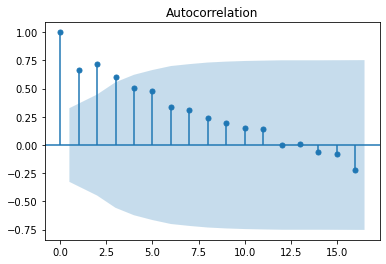

In [56]:
plot_acf(dados2.Sales)
plt.show()

NameError: name 'plt' is not defined

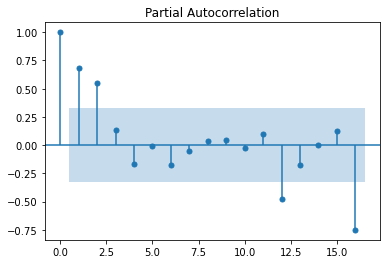

In [32]:
plot_pacf(dados2.Sales)
plt.show()

Olhar apartir do lag 1 para determinar p.

## 3. Criação do Modelo Autorregressivo AR

In [33]:
from statsmodels.tsa.ar_model import AR

In [79]:
modelo = AR(dados2.Sales, freq = "MS").fit(2)
modelo.params
## Em fit colocar valor do p, valor do período

const       8.210192
L1.Sales    0.292450
L2.Sales    0.751931
dtype: float64

  ### 3.1 Validação de modelo preditivo em Treino/Teste
  
Segue a regra:

* Treinamento (separação dos dados em 2/3 dados mais antigos)
<p>
* Teste (1/3 dos dados)

1º Saber o tamanho da série completa

In [58]:
tamanhoDados2 = len(dados2.Sales)

tamanhoDados2

36

### Treino

2º Saber o tamanho da série a ser treinada

In [59]:
tam_treino = int(len(dados2.Sales)* 2/3)
tam_treino

24

In [62]:
serie_train = dados2.Sales[: tam_treino]
serie_train

Month
2000-01-01    266.0
2000-02-01    145.9
2000-03-01    183.1
2000-04-01    119.3
2000-05-01    180.3
2000-06-01    168.5
2000-07-01    231.8
2000-08-01    224.5
2000-09-01    192.8
2000-10-01    122.9
2000-11-01    336.5
2000-12-01    185.9
2001-01-01    194.3
2001-02-01    149.5
2001-03-01    210.1
2001-04-01    273.3
2001-05-01    191.4
2001-06-01    287.0
2001-07-01    226.0
2001-08-01    303.6
2001-09-01    289.9
2001-10-01    421.6
2001-11-01    264.5
2001-12-01    342.3
Name: Sales, dtype: float64

### Teste

In [64]:
serie_test = dados2.Sales[tam_treino: ]
serie_test

Month
2002-01-01    339.7
2002-02-01    440.4
2002-03-01    315.9
2002-04-01    439.3
2002-05-01    401.3
2002-06-01    437.4
2002-07-01    575.5
2002-08-01    407.6
2002-09-01    682.0
2002-10-01    475.3
2002-11-01    581.3
2002-12-01    646.9
Name: Sales, dtype: float64

### Gráfico com a separação da série em Treino e Teste

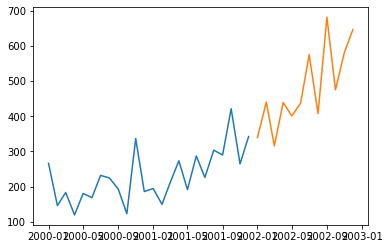

In [74]:
plt.plot(serie_train)
plt.plot(serie_test)

### Criação do Modelo Autorregressivo AR()

A construção do modelo será em cima do conjunto de treinamento


In [76]:
from statsmodels.tsa.ar_model import AR

In [78]:
modelo_AR2 = AR(serie_train, freq= 'MS').fit(2)
modelo_AR2.params

const       82.005541
L1.Sales     0.183201
L2.Sales     0.488723
dtype: float64

Estatísticas do modelo

In [89]:
modelo_AR2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      S  -                  a                  l
Model:                          AR(2)   Log Likelihood                -122.127
Method:                          cmle   S.D. of innovations             62.319
Date:                Tue, 16 Feb 2021   AIC                              8.628
Time:                        16:45:17   BIC                              8.827
Sample:                    01-01-2000   HQIC                             8.675
                         - 12-01-2001                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.0055     58.393      1.404      0.160     -32.443     196.454
L1.Sales       0.1832      0.203      0.903      0.367      -0.215       0.581
L2.Sales       0.4887      0.203      2.409      0.016       0.091       0.886
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2552           +0.0000j            1.2552            0.0000
AR.2           -1.6301           +0.0000j            1.6301            0.5000
-----------------------------------------------------------------------------
"""

Com base nos parâmetros AR(2), temos a equação do modelo:

$$X_{t} = 82 + 0.18 X_{t-1} + 0.48 X_{t-2}$$ 

## 4. Previsão 

A previsão será em cima do conjunto de teste

In [83]:
previsao = modelo_AR2.params[0] + modelo_AR2.params[1] * serie_test.shift(1) +  modelo_AR2.params[2] * serie_test.shift(2) 
previsao

## shift() usado para fezer o deslocamento da serie
## Obs: È possi´vel verificar que o valor das previsões está ocorrendo apartir do mês 2002-03-01 , isso se da pelo fato
## da previsão desse mês depender dos dois meses anteriores, dado que o modelo é AR(2)

Month
2002-01-01           NaN
2002-02-01           NaN
2002-03-01    328.706734
2002-04-01    355.112579
2002-05-01    316.873600
2002-06-01    370.220388
2002-07-01    358.262478
2002-08-01    401.205507
2002-09-01    437.938657
2002-10-01    406.152511
2002-11-01    502.390416
2002-12-01    420.790685
Name: Sales, dtype: float64

### Gráfico com a separação da série em Treino/Teste junto com a Previsão

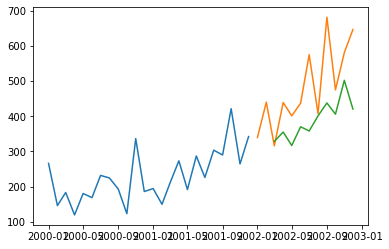

In [85]:
plt.plot(serie_train)
plt.plot(serie_test)
plt.plot(previsao)

Observando o gráfico acima da para reparar que o modelo errou bastante, pois está bem diferente do esperado.

## 5. Verificação Qualidade do Modelo

* Verificação do Erro médio Quadrático

In [87]:
((serie_test - previsao) ** 2).mean()

## Obs: ** para elevar ao quadrado

18782.49412004275

Foi obtido erro quadratico de 18 mil 782